# Advanced Merging and Concatenating
**In this chapter, you’ll leverage powerful filtering techniques, including semi-joins and anti-joins. You’ll also learn how to glue DataFrames by vertically combining and using the pandas.concat function to create new datasets. Finally, because data is rarely clean, you’ll also learn how to validate your newly combined data structures.**

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Steps of a semi-join
1. Merge the left and right tables on key column using an inner-join.
2. Search if the key column in the left table is in the mergerd tables using the `.isin()` method creating a Boolean `Series`.
3. Subset the rows of the left table.

It first merges the tables, then searches it for which rows belong in the final result creating a filter and subsets the left table with that filter.

## Performing an anti-join
In the music streaming company dataset, each customer is assigned an employee representative to assist them. In this exercise, filter the employee table by a table of top customers, returning only those employees who are **not** assigned to a customer. The results should resemble the results of an anti-join. The company's leadership will assign these employees additional training so that they can work with high valued customers.

In [9]:
employees = pd.read_pickle('employees.p')
top_cust = pd.read_pickle('top_cust.p')

In [10]:
employees.head()

,srid,lname,fname,title,hire_date,email
0,1,Adams,Andrew,General Manager,2002-08-14,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,2002-05-01,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2002-04-01,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2003-05-03,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2003-10-17,steve@chinookcorp.com


In [11]:
top_cust.head()

,cid,srid,fname,lname,phone,fax,email
0,1,3,Luís,Gonçalves,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br
1,2,5,Leonie,Köhler,+49 0711 2842222,None,leonekohler@surfeu.de
2,3,3,François,Tremblay,+1 (514) 721-4711,None,ftremblay@gmail.com
3,4,4,Bjørn,Hansen,+47 22 44 22 22,None,bjorn.hansen@yahoo.no
4,5,4,František,Wichterlová,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com


- Merge `employees` and `top_cust` with a left join, setting `indicator` argument to `True`. Save the result to `empl_cust`.

In [17]:
# Merge employees and top_cust
empl_cust = employees.merge(top_cust, on='srid', how='left', indicator=True)
empl_cust.head()

,srid,lname_x,fname_x,title,hire_date,email_x,cid,fname_y,lname_y,phone,fax,email_y,_merge
0,1,Adams,Andrew,General Manager,2002-08-14,andrew@chinookcorp.com,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,2,Edwards,Nancy,Sales Manager,2002-05-01,nancy@chinookcorp.com,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,3,Peacock,Jane,Sales Support Agent,2002-04-01,jane@chinookcorp.com,1.0,Luís,Gonçalves,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,both
3,3,Peacock,Jane,Sales Support Agent,2002-04-01,jane@chinookcorp.com,3.0,François,Tremblay,+1 (514) 721-4711,None,ftremblay@gmail.com,both
4,3,Peacock,Jane,Sales Support Agent,2002-04-01,jane@chinookcorp.com,12.0,Roberto,Almeida,+55 (21) 2271-7000,+55 (21) 2271-7070,roberto.almeida@riotur.gov.br,both


- Select the `srid` column of `empl_cust` and the rows where `_merge` is `'left_only'`. Save the result to `srid_list`.

In [19]:
# Select the srid column where _merge is left_only
srid_list = empl_cust.loc[empl_cust['_merge'] == 'left_only', 'srid']

- Subset the `employees` table and select those rows where the `srid` is in the variable `srid_list` and print the results.

In [14]:
# Get employees not working with top customers
employees[employees['srid'].isin(srid_list)]

,srid,lname,fname,title,hire_date,email
0,1,Adams,Andrew,General Manager,2002-08-14,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,2002-05-01,nancy@chinookcorp.com
5,6,Mitchell,Michael,IT Manager,2003-10-17,michael@chinookcorp.com
6,7,King,Robert,IT Staff,2004-01-02,robert@chinookcorp.com
7,8,Callahan,Laura,IT Staff,2004-03-04,laura@chinookcorp.com


## Performing a semi-join
Some of the tracks that have generated the most significant amount of revenue are from TV-shows or are other non-musical audio. You have been given a table of invoices that include top revenue-generating items. Additionally, you have a table of non-musical tracks from the streaming service. In this exercise, you'll use a semi-join to find the top revenue-generating non-musical tracks.

In [23]:
non_mus_tcks = pd.read_pickle('non_mus_tcks.p')
non_mus_tcks.head(2)

,tid,name,aid,mtid,gid,u_price
0,2820,Occupation / Precipice,227,3,19,1.99
1,2821,"Exodus, Pt. 1",227,3,19,1.99


In [24]:
top_invoices = pd.read_pickle('top_invoices.p')
top_invoices.head(2)

,ilid,iid,tid,uprice,quantity
0,470.0,88.0,2832.0,1.99,1.0
1,473.0,88.0,2850.0,1.99,1.0


In [25]:
genres = pd.read_pickle('genres.p')
genres.head(2)

,gid,name
0,1,Rock
1,2,Jazz


- Merge `non_mus_tcks` and `top_invoices` on `tid` using an inner join. Save the result as `tracks_invoices`.
- Use `.isin()` to subset the rows of `non_mus_tck` where `tid` is in the `tid` column of `tracks_invoices`. Save the result as `top_tracks`.

In [28]:
# Merge the non_mus_tck and top_invoices tables on tid
tracks_invoices = non_mus_tcks.merge(top_invoices, on='tid')

# Use .isin() to subset non_mus_tcks to rows with tid in tracks_invoices
top_tracks = non_mus_tcks[non_mus_tcks['tid'].isin(tracks_invoices['tid'])]

- Group `top_tracks` by `gid` and count the `tid` rows. Save the result to `cnt_by_gid`.
- Merge `cnt_by_gid` with the `genres` table on `gid` and print the result.

In [31]:
# Group the top_tracks by gid and count the tid rows
cnt_by_gid = top_tracks.groupby(['gid'], as_index=False).agg({'tid':'count'})

# Merge the genres table to cnt_by_gid on gid and print
cnt_by_gid.merge(genres, on='gid')

,gid,tid,name
0,19,4,TV Shows
1,21,2,Drama
2,22,1,Comedy


## Concatenation basics
You have been given a few tables of data with musical track info for different albums from the metal band, *Metallica*. The track info comes from their *Ride The Lightning*, *Master Of Puppets*, and *St. Anger* albums. Try various features of the `.concat()` method by concatenating the tables vertically together in different ways.

In [35]:
tracks_master = pd.read_pickle('tracks_master.p')
tracks_ride = pd.read_pickle('tracks_ride.p')
tracks_st = pd.read_pickle('tracks_st.p')

- Concatenate `tracks_master`, `tracks_ride`, and `tracks_st`, in that order, setting `sort` to `True`.

In [37]:
# Concatenate the tracks
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st], sort=True)
tracks_from_albums

,aid,composer,gid,mtid,name,tid,u_price
0,152,J.Hetfield/L.Ulrich,3,1,Battery,1853,0.99
1,152,K.Hammett,3,1,Master Of Puppets,1854,0.99
2,152,J.Hetfield/L.Ulrich,3,1,Disposable Heroes,1857,0.99
0,154,NaN,3,1,Fight Fire With Fire,1874,0.99
1,154,NaN,3,1,Ride The Lightning,1875,0.99
2,154,NaN,3,1,For Whom The Bell Tolls,1876,0.99
3,154,NaN,3,1,Fade To Black,1877,0.99
4,154,NaN,3,1,Trapped Under Ice,1878,0.99
0,155,NaN,3,1,Frantic,1882,0.99
1,155,NaN,3,1,St. Anger,1883,0.99


- Concatenate `tracks_master`, `tracks_ride`, and `tracks_st`, where the index goes from 0 to n-1.

In [38]:
# Concatenate the tracks so the index goes from 0 to n-1
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st]
                               , ignore_index=True, sort=True)
tracks_from_albums

,aid,composer,gid,mtid,name,tid,u_price
0,152,J.Hetfield/L.Ulrich,3,1,Battery,1853,0.99
1,152,K.Hammett,3,1,Master Of Puppets,1854,0.99
2,152,J.Hetfield/L.Ulrich,3,1,Disposable Heroes,1857,0.99
3,154,NaN,3,1,Fight Fire With Fire,1874,0.99
4,154,NaN,3,1,Ride The Lightning,1875,0.99
5,154,NaN,3,1,For Whom The Bell Tolls,1876,0.99
6,154,NaN,3,1,Fade To Black,1877,0.99
7,154,NaN,3,1,Trapped Under Ice,1878,0.99
8,155,NaN,3,1,Frantic,1882,0.99
9,155,NaN,3,1,St. Anger,1883,0.99


- Concatenate `tracks_master`, `tracks_ride`, and `tracks_st`, showing only columns that are in all tables.

In [40]:
# Concatenate the tracks, show only columns names that are in all tables
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st]
                               , join='inner', ignore_index=True, sort=True)
tracks_from_albums

,aid,gid,mtid,name,tid,u_price
0,152,3,1,Battery,1853,0.99
1,152,3,1,Master Of Puppets,1854,0.99
2,152,3,1,Disposable Heroes,1857,0.99
3,154,3,1,Fight Fire With Fire,1874,0.99
4,154,3,1,Ride The Lightning,1875,0.99
5,154,3,1,For Whom The Bell Tolls,1876,0.99
6,154,3,1,Fade To Black,1877,0.99
7,154,3,1,Trapped Under Ice,1878,0.99
8,155,3,1,Frantic,1882,0.99
9,155,3,1,St. Anger,1883,0.99


## Concatenating with keys
The leadership of the music streaming company has come to you and asked you for assistance in analyzing sales for a recent business quarter. They would like to know which month in the quarter saw the highest average invoice total. There are three tables with invoice data named `inv_jul`, `inv_aug`, and `inv_sep`. Concatenate these tables into one to create a graph of the average monthly invoice total.

In [44]:
inv_jul = pd.read_pickle('inv_jul.p')
inv_aug = pd.read_pickle('inv_aug.p')
inv_sep = pd.read_pickle('inv_sep.p')

- Concatenate the three tables together vertically in order with the oldest month first, adding `'7Jul'`, `'8Aug'`, and `'9Sep'` as keys for their respective months, and save to variable `avg_inv_by_month`.
- Use the `.agg()` method to find the average of the `total` column from the grouped invoices.
- Create a bar chart of `avg_inv_by_month`.

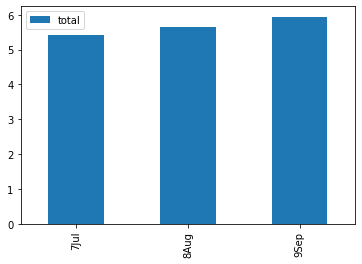

In [50]:
# Concatenate the tables and add keys
inv_jul_thr_sep = pd.concat([inv_jul, inv_aug, inv_sep]
                             ,keys=['7Jul', '8Aug', '9Sep'])

# Group the invoices by the index keys and find avg of the total column
avg_inv_by_month = inv_jul_thr_sep.groupby(level=0).agg({'total':'mean'})

# Bar plot of avg_inv_by_month
avg_inv_by_month.plot(kind='bar')
plt.show()

*Concatenating the tables with a key provides a hierarchical index that can be used for grouping. Once grouped, you can average the groups and create plots. You were able to find out that September had the highest average invoice total.*

## Using the append method
The `.concat()` method is excellent when you need a lot of control over how concatenation is performed. However, if you do not need as much control, then the `.append()` method is another option. You'll try this method out by appending the track lists together from different Metallica albums. From there, you will merge it with the `invoice_items` table to determine which track sold the most.

In [63]:
invoice_items = pd.read_pickle('invoice_items.p')
invoice_items.head(2)

,ilid,iid,tid,uprice,quantity
0,1.0,1.0,2.0,0.99,1.0
1,2.0,1.0,4.0,0.99,1.0


- Use the `.append()` method to combine **(in this order)**`tracks_ride`, `tracks_master`, and `tracks_st` together vertically, and save to `metallica_tracks`.
- Merge `metallica_tracks` and `invoice_items` on `tid` with an inner join, and save to `tracks_invoices`.

In [64]:
# Use the .append() method to combine the tracks tables
metallica_tracks = tracks_ride.append([tracks_master, tracks_st], sort=False)

# Merge metallica_tracks and invoice_items
tracks_invoices = metallica_tracks.merge(invoice_items, on='tid')

- For each `tid` and `name` in `tracks_invoices`, sum the quantity sold column, and save as `tracks_sold`.
- Sort `tracks_sold` in descending order by the `quantity` column, and print the table.

In [65]:
# For each tid and name sum the quantity sold.
tracks_sold = tracks_invoices.groupby(['tid','name']).agg({'quantity':'sum'})

# Sort in decending order by quantity and print the results
print(tracks_sold.sort_values('quantity', ascending=False))

                              quantity
tid  name                             
1853 Battery                       2.0
1876 For Whom The Bell Tolls       2.0
1854 Master Of Puppets             1.0
1857 Disposable Heroes             1.0
1875 Ride The Lightning            1.0
1877 Fade To Black                 1.0
1882 Frantic                       1.0
1884 Some Kind Of Monster          1.0
1886 Invisible Kid                 1.0


## Concatenate and merge to find common songs
The senior leadership of the streaming service is requesting your help again. You are given the historical files for a popular playlist in the classical music genre in 2018 and 2019. Additionally, you are given a similar set of files for the most popular pop music genre playlist on the streaming service in 2018 and 2019. Your goal is to concatenate the respective files to make a large classical playlist table and overall popular music table. Then filter the classical music table using a semi-join to return only the most popular classical music tracks.

In [70]:
classic_18 = pd.read_pickle('classic_18.p')
classic_19 = pd.read_pickle('classic_19.p')
pop_18 = pd.read_pickle('pop_18.p')
pop_19 = pd.read_pickle('pop_19.p')

- Concatenate the `classic_18` and `classic_19` tables vertically where the index goes from 0 to n-1, and save to `classic_18_19`.
- Concatenate the `pop_18` and `pop_19` tables vertically where the index goes from 0 to n-1, and save to `pop_18_19`.

In [73]:
# Concatenate the classic tables vertically
classic_18_19 = pd.concat([classic_18, classic_19], ignore_index=True)

# Concatenate the pop tables vertically
pop_18_19 = pd.concat([pop_18, pop_19], ignore_index=True)

- With `classic_18_19` on the left, merge it with `pop_18_19` on `tid` using an inner join.
- Use `.isin()` to filter `classic_18_19` where `tid` is in `classic_pop`.

In [77]:
# Merge classic_18_19 with pop_18_19
classic_pop = classic_18_19.merge(pop_18_19, on='tid')

# Using .isin(), filter classic_18_19 rows where tid is in classic_pop
popular_classic = classic_18_19[classic_18_19['tid'].isin(classic_pop['tid'])]

popular_classic

,pid,tid
3,12,3479
10,12,3439
21,12,3445
23,12,3449
48,12,3437
50,12,3435
